In [1]:
import numpy as np
import pandas as pd

estimates = pd.read_pickle("../output/estimates_sim_records_precision.pickle")
ground_truth = pd.read_csv("../output/ground_truth.tsv", sep="\t")

In [2]:
ground_truth.rename(columns={"Unnamed: 0":"rate"}, inplace=True)

In [3]:
ground_truth

,rate,precision,recall
0,5,0.884156,0.901775
1,10,0.778336,0.809378
2,20,0.593244,0.640936


In [4]:
estimates["mean_ests"] = estimates.apply(lambda x: np.mean(x.estimates, where=~np.isnan(x.estimates)), axis=1)
estimates["rate"] = estimates["rate"].astype(int)
estimates["gt_precision"] = estimates.apply(lambda x: ground_truth.set_index("rate").precision[x.rate], axis=1)
estimates["bias"] = estimates.apply(lambda x: x.mean_ests - x.gt_precision, axis=1)
estimates["rmse"] = estimates.apply(lambda x: np.sqrt(np.mean((np.array(x.estimates) - x.gt_precision)**2)), axis=1)

In [5]:
estimates

,sample_size,rate,estimator,estimates,mean_ests,gt_precision,bias,rmse
0,100,20,P_naive,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.999835,0.593244,0.406591,0.406594
1,100,20,P_single_block,"[0.6814142560030252, 0.71500553029372, 0.70776...",0.737065,0.593244,0.143821,0.149189
2,100,20,P_record,"[0.45561042064472196, 0.5250812555079721, 0.37...",0.575914,0.593244,-0.017329,0.200660
3,100,20,P_cluster_block,"[0.447515499736292, 0.538727145810104, 0.57635...",0.589325,0.593244,-0.003918,0.073855
4,100,5,P_naive,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9881698805157...",0.999882,0.884156,0.115726,0.115732
5,100,5,P_single_block,"[0.9383866186745713, 0.9335560981878935, 0.945...",0.935084,0.884156,0.050929,0.054689
6,100,5,P_record,"[0.6572410768322472, 0.7123678599709479, 0.547...",0.862354,0.884156,-0.021801,0.293502
7,100,5,P_cluster_block,"[0.9028067291416136, 0.7871776198358937, 0.911...",0.882604,0.884156,-0.001552,0.046970
8,100,10,P_naive,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.999688,0.778336,0.221351,0.221362
9,100,10,P_single_block,"[0.8647953717591601, 0.8737933500178763, 0.819...",0.866547,0.778336,0.088211,0.092790


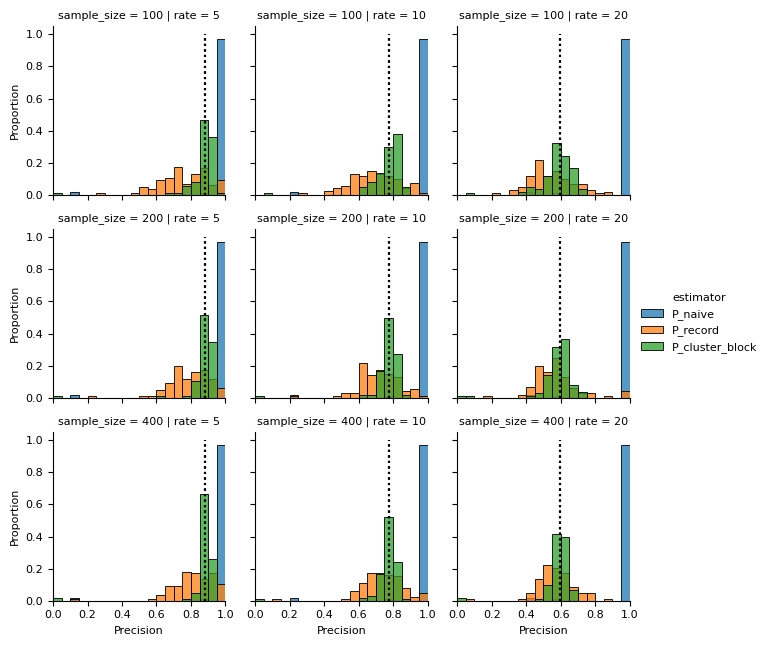

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', size=8) #controls default text size
plt.rc('axes', titlesize=10) 
plt.rc('axes', labelsize=8) 
plt.rc('xtick', labelsize=8) 
plt.rc('ytick', labelsize=8) 

dat = estimates.query('estimator != "P_single_block"')
dat = (
    dat
    .estimates
    .apply(pd.Series)
    .merge(dat, right_index=True, left_index=True)
    .melt(id_vars=['sample_size', 'rate', 'estimator', 'estimates'], value_name="estimate")
    .rename(columns={"estimate":"Precision"})
)

g = sns.FacetGrid(dat, hue="estimator", col="rate", row="sample_size", sharey=True, height=6.5/3)
g.set(xlim=(0,1))
g.map(sns.histplot, "Precision", kde=False, common_norm=True, stat="proportion", bins=20, binrange=(0,1), multiple="layer")
g.add_legend()

gt_precision = ground_truth.set_index("rate")["precision"]
for x in g.facet_data():
    ax = g.facet_axis(x[0][0], x[0][1])
    rate = x[1].rate.values[0]
    plt.vlines(x=gt_precision[rate], ymin=0, ymax=1, color="black", linestyles="dotted")

plt.savefig("../output/sim_records_precision.pdf", format="pdf", bbox_inches="tight")
plt.show()